In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
flower = pd.read_csv("C:\\Users\\justu\\Downloads\\archive\\Iris.csv")
flower.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
flower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [20]:
flower.shape

(150, 6)

In [21]:
flower.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [22]:
flower.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [23]:
# We will drop 'Id' since it is not relevant to our model
flower.drop(['Id'], axis=1, inplace=True)
flower.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Split the dataset

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# X contains the feature columns
X = flower[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
# y contains the target column
y = flower['Species']

In [27]:
from sklearn.preprocessing import LabelEncoder
# Encode the target variable (species) to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [28]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***test_size = 0.2 means that 20% of the data will be used for testing, and the rest for training***

***random_state = 42 is just a random seed for reproducibility, any integer value can be used***

### Building the Model

In [29]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [30]:
# Build the neural network model
model = Sequential([
    Dense(10, input_shape=(4,), activation='relu'),  # 10 neurons, input shape (4 features)
    Dense(8, activation='relu'),  # 8 neurons
    Dense(3, activation='softmax')  # 3 neurons (one for each class), softmax for multi-class classification
])

C:\Users\justu\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=1)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6841 - loss: 0.8310
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6531 - loss: 0.8029 
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6051 - loss: 0.7737
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7006 - loss: 0.6887
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6539 - loss: 0.6715
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6574 - loss: 0.6347
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6776 - loss: 0.5942
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7368 - loss: 0.5553
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6860 - loss: 0.5593
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7546 - loss: 0.5780
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7612 - loss: 0.5528
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

In [33]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', test_accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.9667 - loss: 0.0985
Test accuracy: 0.9666666388511658


### Make Predictions

#### Train_set prediction

In [34]:
# Make predictions on the training set
train_predictions = model.predict(X_train)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [35]:
# Since our model is a multi-class classification model, we convert to convert the predictions to class labels
train_predicted_classes = np.argmax(train_predictions, axis=1)

In [36]:
# Print the predicted class labels for the training set
print('Predicted Class Labels for Training Set:', train_predicted_classes)

Predicted Class Labels for Training Set: [0 0 1 0 0 2 1 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1
 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 2 2 2 1 0 0 2 2 0 0 0 2
 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1
 1 2 2 0 1 2 0 1 2]


#### Test_set prediction

In [37]:
# Make predictions on the testing set
test_predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [38]:
# Since our model is a multi-class classification model, we convert to convert the predictions to class labels
test_predicted_classes = np.argmax(test_predictions, axis=1)

In [39]:
print('Predicted Class Labels for Testing Set:', test_predicted_classes)

Predicted Class Labels for Testing Set: [1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


### Evaluation(precision_score,recall_score,f1_score)

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming 'predictions' contains the model's predictions on the test set
precision = precision_score(y_test, test_predicted_classes, average='weighted')
recall = recall_score(y_test, test_predicted_classes, average='weighted')
f1 = f1_score(y_test, test_predicted_classes, average='weighted')

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.9694444444444444
Recall: 0.9666666666666667
F1 Score: 0.9664109121909632


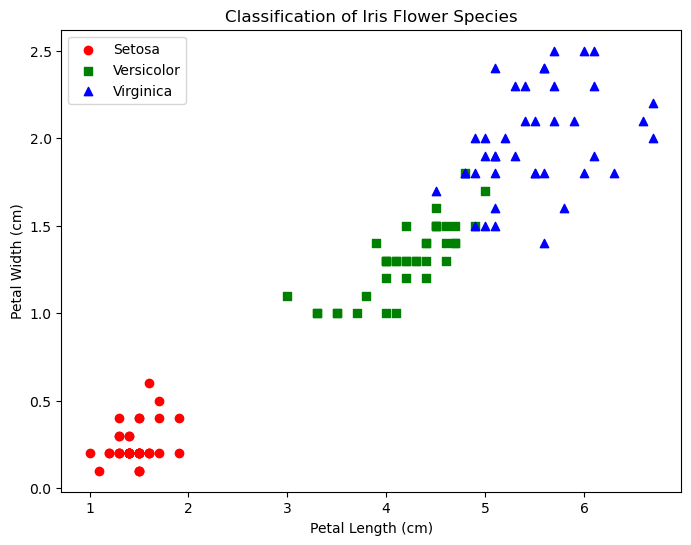

In [41]:
# Create a scatter plot to visualize the classification
plt.figure(figsize=(8, 6))

# Scatter plot for Setosa
plt.scatter(X_train[train_predicted_classes == 0]['PetalLengthCm'], X_train[train_predicted_classes == 0]['PetalWidthCm'], label='Setosa', c='r', marker='o')

# Scatter plot for Versicolor
plt.scatter(X_train[train_predicted_classes == 1]['PetalLengthCm'], X_train[train_predicted_classes == 1]['PetalWidthCm'], label='Versicolor', c='g', marker='s')

# Scatter plot for Virginica
plt.scatter(X_train[train_predicted_classes == 2]['PetalLengthCm'], X_train[train_predicted_classes == 2]['PetalWidthCm'], label='Virginica', c='b', marker='^')

# Add labels and title
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Classification of Iris Flower Species')
plt.legend()
plt.show()


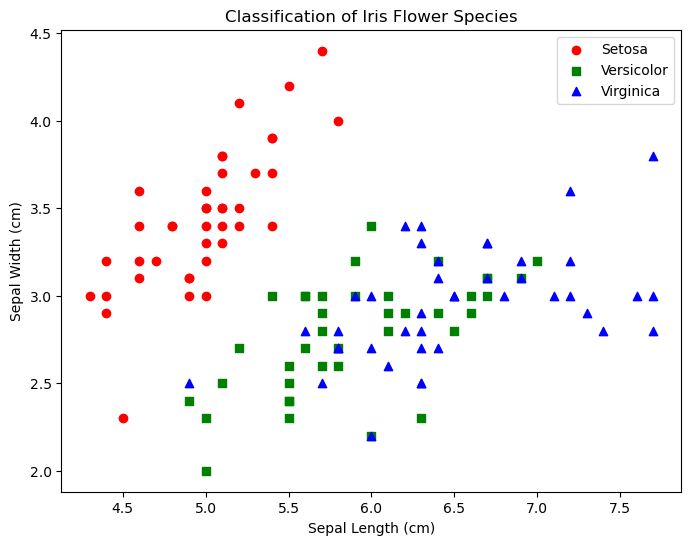

In [43]:
# Create a scatter plot to visualize the classification
plt.figure(figsize=(8, 6))

# Scatter plot for Setosa
plt.scatter(X_train[train_predicted_classes == 0]['SepalLengthCm'], X_train[train_predicted_classes == 0]['SepalWidthCm'], label='Setosa', c='r', marker='o')

# Scatter plot for Versicolor
plt.scatter(X_train[train_predicted_classes == 1]['SepalLengthCm'], X_train[train_predicted_classes == 1]['SepalWidthCm'], label='Versicolor', c='g', marker='s')

# Scatter plot for Virginica
plt.scatter(X_train[train_predicted_classes == 2]['SepalLengthCm'], X_train[train_predicted_classes == 2]['SepalWidthCm'], label='Virginica', c='b', marker='^')

# Add labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Classification of Iris Flower Species')
plt.legend()
plt.show()
